In [22]:
import pandas as pd
from prophet import Prophet

In [23]:
df_basel = pd.read_csv('data/traffic_data_basel.csv', names=["ds", "y"], header=0)
df_fribourg = pd.read_csv('data/traffic_data_fribourg.csv', names=["ds", "y"], header=0)
df_fribourg.head()
df_basel.head()

,ds,y
0,2008-01-31,107657.741935
1,2008-02-29,112990.551724
2,2008-03-31,114162.000000
3,2008-04-30,118306.566667
4,2008-05-31,117380.774194


In [24]:
model_basel = Prophet()
model_basel.fit(df_basel)

18:37:03 - cmdstanpy - INFO - Chain [1] start processing
18:37:03 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
future = model_basel.make_future_dataframe(periods=12*25, freq='M')
future.tail()

/Users/gallouche/miniconda3/envs/PI_ExplAI/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
485,2048-08-31
486,2048-09-30
487,2048-10-31
488,2048-11-30
489,2048-12-31


In [26]:
forecast = model_basel.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
485,2048-08-31,185447.830834,133465.894849,238753.313481
486,2048-09-30,184407.269829,129802.805520,237703.677167
487,2048-10-31,182208.414109,128383.884720,235994.597159
488,2048-11-30,176148.695749,121972.836308,231388.249577
489,2048-12-31,170896.981610,117579.433274,226671.362981


/Users/gallouche/miniconda3/envs/PI_ExplAI/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/gallouche/miniconda3/envs/PI_ExplAI/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


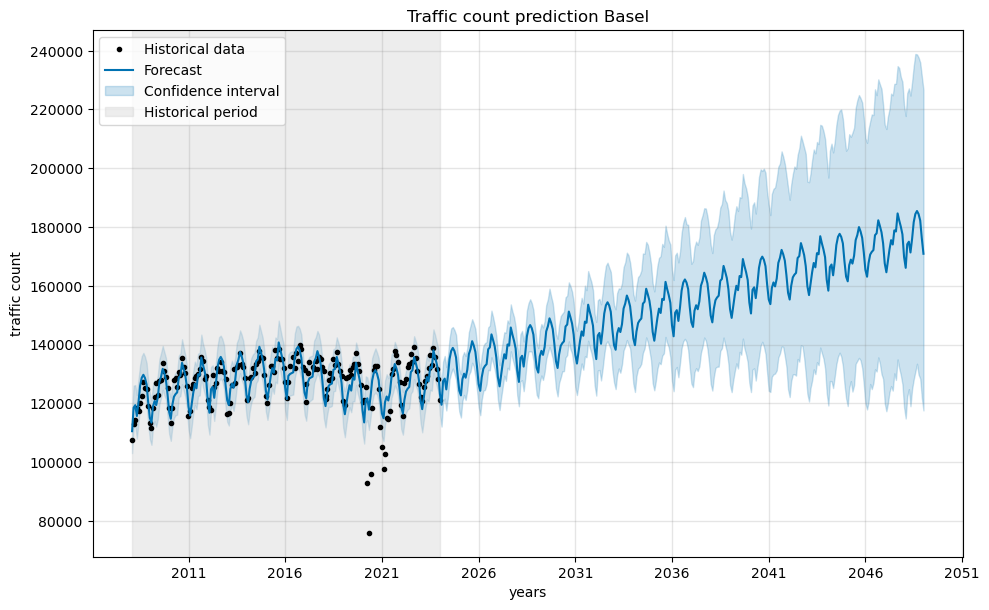

In [27]:
import matplotlib.pyplot as plt

cutoff = df_basel['ds'].max()

fig1 = model_basel.plot(forecast)
plt.xlabel("years")  
plt.ylabel("traffic count")  
plt.title("Traffic count prediction Basel")
plt.axvspan(forecast['ds'].min(), cutoff, color='lightgrey', alpha=0.4, label='Historical period')
plt.legend(["Historical data", "Forecast", "Confidence interval", "Historical period"], loc="upper left")

fig1.savefig("images/basel_traffic_forecast.png", dpi=300, bbox_inches='tight')

In [28]:
import os

output_path = os.path.join("prediction-results", "traffic_data_basel-predict.csv")

forecast.to_csv(output_path, index=False)

print(f"Saved predictions to: {output_path}")

Saved predictions to: prediction-results/traffic_data_basel-predict.csv


18:37:04 - cmdstanpy - INFO - Chain [1] start processing
18:37:04 - cmdstanpy - INFO - Chain [1] done processing
/Users/gallouche/miniconda3/envs/PI_ExplAI/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/Users/gallouche/miniconda3/envs/PI_ExplAI/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/gallouche/miniconda3/envs/PI_ExplAI/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the 

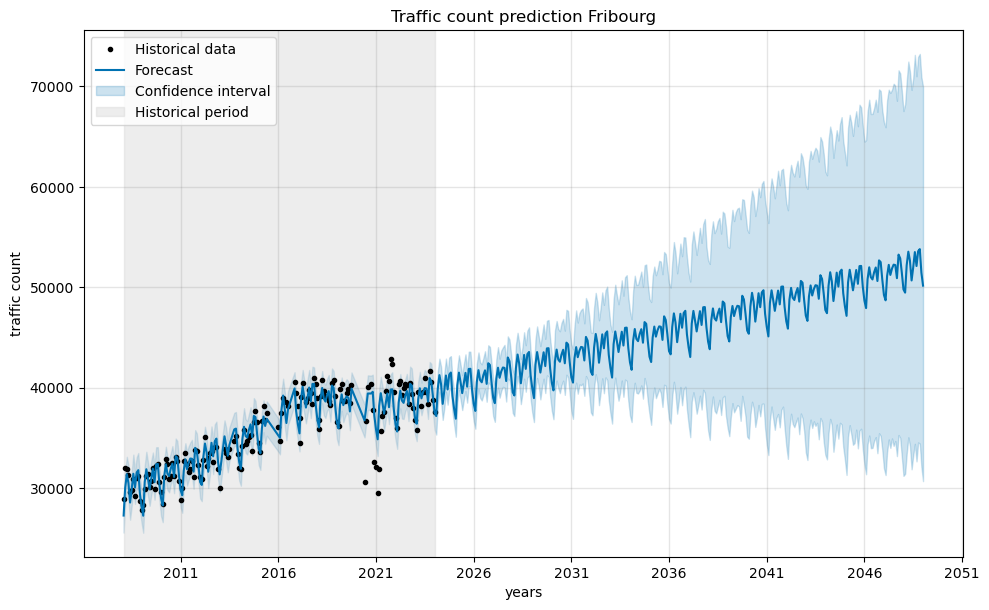

In [29]:
model_fribourg = Prophet()
model_fribourg.fit(df_fribourg)

future_fribourg = model_fribourg.make_future_dataframe(periods=12*25, freq='M')
future_fribourg.tail()

forecast_fribourg = model_fribourg.predict(future_fribourg)
forecast_fribourg[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

cutoff = df_fribourg['ds'].max()

fig1 = model_fribourg.plot(forecast_fribourg)
plt.xlabel("years")  
plt.ylabel("traffic count") 
plt.title("Traffic count prediction Fribourg")
plt.axvspan(forecast_fribourg['ds'].min(), cutoff, color='lightgrey', alpha=0.4, label='Historical period')
plt.legend(["Historical data", "Forecast", "Confidence interval", "Historical period"], loc="upper left")

fig1.savefig("images/fribourg_traffic_forecast.png", dpi=300, bbox_inches='tight')


In [30]:
output_path = os.path.join("prediction-results", "traffic_data_fribourg-predict.csv")

forecast_fribourg.to_csv(output_path, index=False)

print(f"Saved predictions to: {output_path}")

Saved predictions to: prediction-results/traffic_data_fribourg-predict.csv
